# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Output File (CSV)
#output_data_file = "Output/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

In [14]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"



# Build query URL
query_url = url + "&appid=" + weather_api_key + "&q="

In [ ]:
# #Get weather data
# selected = 'London'
# weather_response = requests.get(query_url+selected)
# weatherjson = weather_response.json()
# print(json.dumps(weatherjson, indent=4, sort_keys=True))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Request weather informatiton for the selected cities and save them into lists

City = []
Lat = []
Lng = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Country = []
Date =[]


print("Beginning Data Retrieval")
print("----------------------------")
counter = 1
stage = 1
for city_name in cities:
    
    try: 
        weather_json = requests.get(query_url+city_name).json()


        City.append(weather_json["name"])
        Lat.append(weather_json["coord"]["lat"])
        Lng.append(weather_json["coord"]["lon"])
        MaxTemp.append(weather_json["main"]["temp_max"])
        Humidity.append(weather_json["main"]["humidity"])
        Cloudiness.append(weather_json["clouds"]['all'])
        WindSpeed.append(weather_json["wind"]["speed"])
        Country.append(weather_json["sys"]["country"])
        Date.append(weather_json["dt"])
        print(f'Processing Record {counter} of Set {stage} | {city_name}')
        counter = counter + 1
        if (counter == 50):
                counter = 0
                stage = stage+1
    except:
        print("Did not find the city...go to the next!!")
        continue  
print ("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")   


        
     

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | pangnirtung
Processing Record 8 of Set 1 | chapais
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | belle fourche
Processing Record 11 of Set 1 | mareeba
Processing Record 12 of Set 1 | byron bay
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | yambio
Processing Record 15 of Set 1 | awjilah
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | fort nelson
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | arraial do cabo
Did not find the city...go to the next!!
Processing Record 20 of Set 1 | viedma
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | ostrovnoy


Processing Record 38 of Set 4 | taltal
Processing Record 39 of Set 4 | qasigiannguit
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | valley city
Processing Record 43 of Set 4 | mattru
Processing Record 44 of Set 4 | the valley
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | odesskoye
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | cabra
Processing Record 49 of Set 4 | cedral
Processing Record 0 of Set 5 | diffa
Processing Record 1 of Set 5 | kuytun
Processing Record 2 of Set 5 | maua
Processing Record 3 of Set 5 | abu kamal
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | lata
Did not find the city...go to the next!!
Processing Record 6 of Set 5 | gat
Processing Record 7 of Set 5 | tukrah
Processing Record 8 of Set 5 | odessa
Processing Record 9 of Set 5 | yar-sale
Did not find the city...go to the next!!
Processing Record 10 of Set 5 | mar del plata
Proce

Processing Record 17 of Set 8 | northam
Processing Record 18 of Set 8 | oranjemund
Processing Record 19 of Set 8 | waingapu
Processing Record 20 of Set 8 | provideniya
Processing Record 21 of Set 8 | faya
Processing Record 22 of Set 8 | juneau
Processing Record 23 of Set 8 | gold coast
Did not find the city...go to the next!!
Processing Record 24 of Set 8 | vanimo
Processing Record 25 of Set 8 | tazmalt
Processing Record 26 of Set 8 | port blair
Processing Record 27 of Set 8 | bay roberts
Processing Record 28 of Set 8 | kapuskasing
Processing Record 29 of Set 8 | valdivia
Processing Record 30 of Set 8 | lydenburg
Processing Record 31 of Set 8 | ilulissat
Processing Record 32 of Set 8 | sabirabad
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | chipinge
Processing Record 35 of Set 8 | los llanos de aridane
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | sol-iletsk
Did not find the city...go to the next!!
Processing Record 38 of Set 8 | 

Processing Record 47 of Set 11 | qui nhon
Processing Record 48 of Set 11 | uchiza
Processing Record 49 of Set 11 | pijino
Processing Record 0 of Set 12 | puerto madero
Processing Record 1 of Set 12 | rockhampton
Processing Record 2 of Set 12 | flin flon
Processing Record 3 of Set 12 | boa vista
Processing Record 4 of Set 12 | morondava
Processing Record 5 of Set 12 | anito
Processing Record 6 of Set 12 | leirvik
Did not find the city...go to the next!!
Did not find the city...go to the next!!
Processing Record 7 of Set 12 | shingu
Processing Record 8 of Set 12 | paragominas
Processing Record 9 of Set 12 | kamariotissa
Processing Record 10 of Set 12 | campo maior
Processing Record 11 of Set 12 | lompoc
Processing Record 12 of Set 12 | kirakira
Processing Record 13 of Set 12 | inuvik
Processing Record 14 of Set 12 | lesnoy
Processing Record 15 of Set 12 | novoilinsk
Processing Record 16 of Set 12 | buy
Processing Record 17 of Set 12 | nadym
Processing Record 18 of Set 12 | kaberamaido
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Create a dataframe from the lists of weather information gathered
main_df = pd.DataFrame({
    "City":City, 'Lat':Lat, 'Lng':Lng, 'Max Temp':MaxTemp,'Humidity':Humidity, 
    'Cloudiness':Cloudiness, 'Wind Speed':WindSpeed, 'Country':Country, 'Date':Date
    })

#Save the cities weather info in a .csv file
main_df.to_csv("Output/Cities.csv", index=False, header=True)

main_df





,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.41,57.70,80.60,65,20,6.93,MU,1605939733
1,Busselton,-33.65,115.33,75.99,42,57,14.20,AU,1605939733
2,Pevek,69.70,170.31,12.45,97,98,4.88,RU,1605939733
3,Rikitea,-23.12,-134.97,72.81,65,71,6.53,PF,1605939733
4,Avarua,-21.21,-159.78,77.00,83,98,3.36,CK,1605939734
...,...,...,...,...,...,...,...,...,...
567,Kaberamaido,1.74,33.16,75.40,76,35,1.70,UG,1605939951
568,Belaya Gora,68.53,146.42,-9.18,91,94,3.36,RU,1605939952
569,Suntar,62.14,117.63,9.93,93,100,6.49,RU,1605939952
570,Binzhou,37.37,118.02,40.32,92,100,7.63,CN,1605939672


In [24]:
main_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.574406,19.257867,54.429388,74.548951,52.069930,8.423234,1.605940e+09
std,33.922318,90.349028,24.989293,19.243469,39.102837,6.049422,8.533080e+01
min,-54.800000,-175.200000,-11.200000,2.000000,0.000000,0.130000,1.605939e+09
25%,-8.862500,-59.645000,33.800000,65.000000,7.000000,4.067500,1.605940e+09
50%,27.545000,20.505000,60.970000,78.000000,59.500000,6.970000,1.605940e+09
75%,49.285000,100.342500,75.405000,89.000000,90.000000,11.240000,1.605940e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,46.080000,1.605940e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
main_df.loc[main_df["Humidity"] >100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.

humidity_more100 = main_df.loc[main_df["Humidity"] >100].index
humidity_more100

#main_df['Humidity'].describe()
# based on the my code above.. there is no city with humidity greater than 100

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#Drop the cities with humidity > 100%
#No cities found in my code
clean_humidity = main_df.drop(humidity_more100, inplace = False)

clean_humidity["Humidity"].describe()

clean_humidity.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahébourg,-20.41,57.70,80.60,65,20,6.93,MU,1605939733
1,Busselton,-33.65,115.33,75.99,42,57,14.20,AU,1605939733
2,Pevek,69.70,170.31,12.45,97,98,4.88,RU,1605939733
3,Rikitea,-23.12,-134.97,72.81,65,71,6.53,PF,1605939733
4,Avarua,-21.21,-159.78,77.00,83,98,3.36,CK,1605939734


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [22]:
# import time
# convert datetime to 10 digit value
# my_time = time.strptime("11/20/20", "%m/%d/%y")
# timevalue = time.mktime(my_time)
# print(timevalue)

ts = time.gmtime(clean_humidity['Date'][0])
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts))
datestr = time.strftime("%x",ts)
datestr

'11/21/20'

## Latitude vs. Temperature Plot

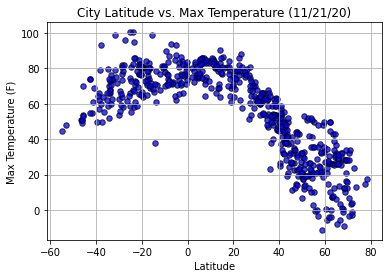

In [25]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Max Temp'], 
            marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)

plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

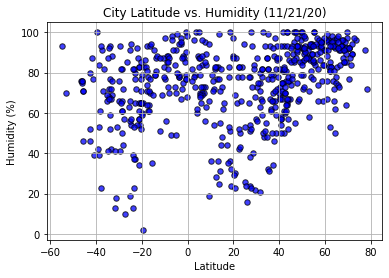

In [26]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Humidity'],
           marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)

plt.grid()
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatvsHumd.png")
plt.show()

## Latitude vs. Cloudiness Plot

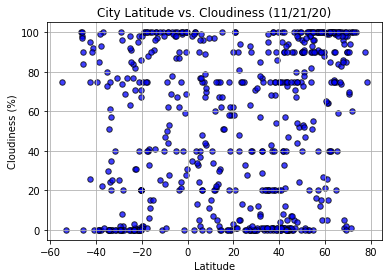

In [27]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Cloudiness'],
           marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)

plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatvsCld.png")
plt.show()

## Latitude vs. Wind Speed Plot

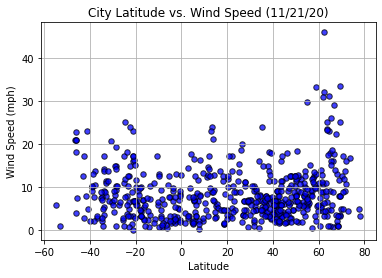

In [29]:
plt.scatter(clean_humidity['Lat'], clean_humidity['Wind Speed'],
           marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatvsWind.png")
plt.show()

## Linear Regression

In [31]:
# Get cities in northern hemisphere
north_cities = clean_humidity.loc[clean_humidity["Lat"] > 0.0]
north_cities.reset_index(inplace=True)

# Get cities in southern hemisphere
south_cities = clean_humidity.loc[clean_humidity["Lat"] < 0.0]
south_cities.reset_index(inplace=True)

In [64]:
# Define a function for plotting

def LinearRegrPlot(xdata, ydata, plt_title, x_label, y_label, label_posi, fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,label_posi,fontsize=15,color="red")
    plt.title(plt_title + f'({datestr})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"Images/{fig_name}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8811527514256756


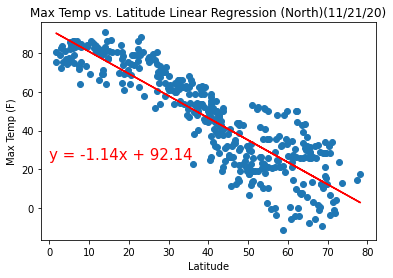

In [65]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Max Temp'
plt_title = "Max Temp vs. Latitude Linear Regression (North)"
x_label = "Latitude"
y_label = "Max Temp (F)"
label_posi = (0,25)
fig_name = 'TempvsLatLinReg_N'
LinearRegrPlot(north_cities[xdata],north_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46360075323220784


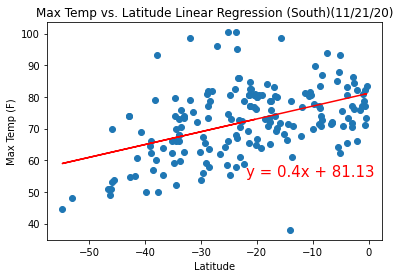

In [66]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Max Temp'
plt_title = "Max Temp vs. Latitude Linear Regression (South)"
x_label = "Latitude"
y_label = "Max Temp (F)"
label_posi = (-22,55)
fig_name = 'TempvsLatLinReg_S'
LinearRegrPlot(south_cities[xdata],south_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40423337444658136


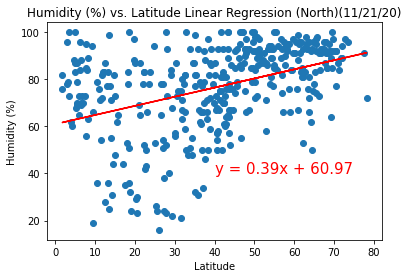

In [67]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Humidity'
plt_title = "Humidity (%) vs. Latitude Linear Regression (North)"
x_label = "Latitude"
y_label = "Humidity (%)"
label_posi = (40,40)
fig_name = 'HumdvsLatLinReg_N'
LinearRegrPlot(north_cities[xdata],north_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29435400740657197


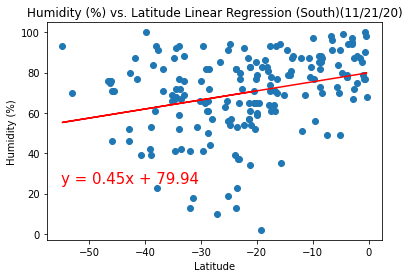

In [68]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Humidity'
plt_title = "Humidity (%) vs. Latitude Linear Regression (South)"
x_label = "Latitude"
y_label = "Humidity (%)"
label_posi = (-55,25)
fig_name = 'HumdvsLatLinReg_S'
LinearRegrPlot(south_cities[xdata],south_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.31112940473745054


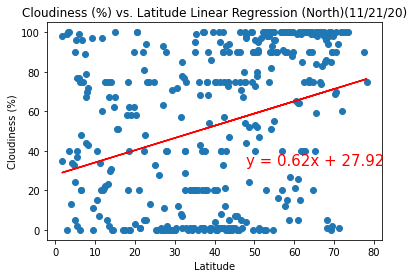

In [69]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Cloudiness'
plt_title = "Cloudiness (%) vs. Latitude Linear Regression (North)"
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_posi = (48,33)
fig_name = 'CloudvsLatLinReg_N'
LinearRegrPlot(north_cities[xdata],north_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20901770451654067


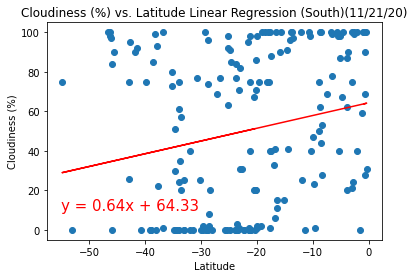

In [72]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Cloudiness'
plt_title = "Cloudiness (%) vs. Latitude Linear Regression (South)"
x_label = "Latitude"
y_label = "Cloudiness (%)"
label_posi = (-55,10)
fig_name = 'CloudvsLatLinReg_S'
LinearRegrPlot(south_cities[xdata],south_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18841949784932574


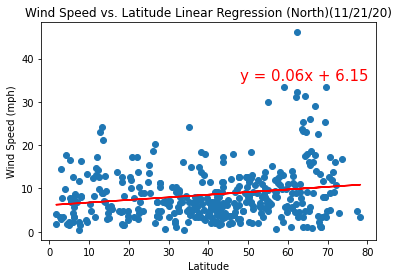

In [74]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Wind Speed'
plt_title = "Wind Speed vs. Latitude Linear Regression (North)"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_posi = (48,35)
fig_name = 'WindvsLatLinReg_N'
LinearRegrPlot(north_cities[xdata],north_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.30598840716466014


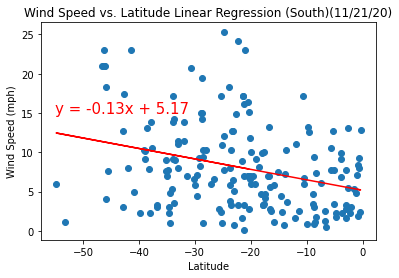

In [76]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
xdata = 'Lat'
ydata = 'Wind Speed'
plt_title = "Wind Speed vs. Latitude Linear Regression (South)"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
label_posi = (-55,15)
fig_name = 'WindvsLatLinReg_S'
LinearRegrPlot(south_cities[xdata],south_cities[ydata], plt_title, x_label, y_label, label_posi, fig_name)